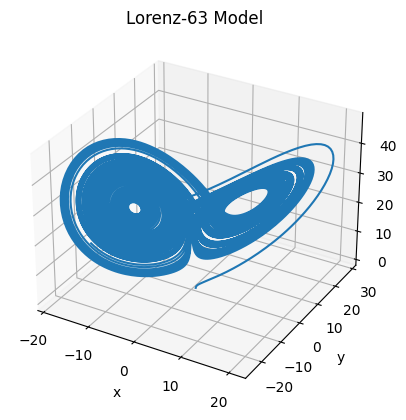

In [4]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def dudt(t, u, sigma=11, r=28, b=8/3):
    x = u[0]
    y = u[1]
    z = u[2]
    dxdt = sigma*(y-x)
    dydt = r*x - y - x*z
    dzdt = x*y - b*z
    return(np.array([dxdt, dydt, dzdt]))

u0 = np.array([1, 0, -1])
sol = solve_ivp(dudt, (0, 100), u0, method="RK45")
#print(sol["t"])
#print(sol["y"])

sol = solve_ivp(dudt, (0, 100), u0, method="RK45", dense_output=True)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Compute a dense solution
t = np.linspace(0, 100, 20001)
sol_dense = sol.sol(t)
ax.plot(*sol_dense)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Lorenz-63 Model")
plt.show()
